# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [18]:
# Testing to see json format
url = "http://api.openweathermap.org/data/2.5/weather?"
city_prueba = cities[0]
query_url_prueba = f"{url}appid={api_key}&q={city_prueba}"

response_prueba = requests.get(query_url_prueba).json()
response_prueba              

{'coord': {'lon': 20.04, 'lat': -34.53},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 288.26,
  'pressure': 1021,
  'humidity': 82,
  'temp_min': 287.15,
  'temp_max': 289.26},
 'wind': {'speed': 2.1, 'deg': 190},
 'rain': {'3h': 0.188},
 'clouds': {'all': 65},
 'dt': 1570918319,
 'sys': {'type': 1,
  'id': 1966,
  'country': 'ZA',
  'sunrise': 1570939245,
  'sunset': 1570985478},
 'timezone': 7200,
 'id': 1015776,
 'name': 'Bredasdorp',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [13]:
#URL definition
url = "http://api.openweathermap.org/data/2.5/weather?"
i=1

#Initial Message
print("Beginning Data Retrieval")
print("-----------------------------")

#CSV Headers
with open(output_data_file, mode="w") as csvfile:
    weather_writer = csv.writer(csvfile, delimiter=",")
    weather_writer.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

    for city in cities:

        #Message Print
        print(f"Processing record {i} | {city}")
        i += 1

        # Build query URL
        query_url = f"{url}appid={api_key}&q={city}"

        #Storing API response for further use
        response = requests.get(query_url).json()
        try:
            weather_writer.writerow([
                city,
                response['clouds']['all'],
                response['sys']['country'],
                response['dt'],
                response['main']['humidity'],
                response['coord']['lat'],
                response['coord']['lon'],
                response['main']['temp_max'],
                response['wind']['speed']
            ])
        except:
            print("City not found.")


Beginning Data Retrieval
-----------------------------
Processing record 1 | bredasdorp
Processing record 2 | cape town
Processing record 3 | norman wells
Processing record 4 | khatanga
Processing record 5 | rikitea
Processing record 6 | bluff
Processing record 7 | crixas
Processing record 8 | nemuro
Processing record 9 | yellowknife
Processing record 10 | mataura
Processing record 11 | bethel
Processing record 12 | puerto ayora
Processing record 13 | kaitangata
Processing record 14 | lebu
Processing record 15 | punta arenas
Processing record 16 | shalya
Processing record 17 | taolanaro
City not found.
Processing record 18 | grand river south east
City not found.
Processing record 19 | hilo
Processing record 20 | illoqqortoormiut
City not found.
Processing record 21 | ushuaia
Processing record 22 | albany
Processing record 23 | kapaa
Processing record 24 | burkhala
City not found.
Processing record 25 | leeuwarden
Processing record 26 | busselton
Processing record 27 | lompoc
Processin

Processing record 234 | bandiagara
Processing record 235 | namatanai
Processing record 236 | dryden
Processing record 237 | ucluelet
Processing record 238 | saldanha
Processing record 239 | hofn
Processing record 240 | maneadero
City not found.
Processing record 241 | kendari
Processing record 242 | thompson
Processing record 243 | amderma
City not found.
Processing record 244 | bantry
City not found.
Processing record 245 | berlevag
Processing record 246 | sitka
Processing record 247 | luanda
Processing record 248 | isangel
Processing record 249 | abbeville
Processing record 250 | aykhal
Processing record 251 | richards bay
Processing record 252 | cherskiy
Processing record 253 | menongue
Processing record 254 | yondo
Processing record 255 | tabou
Processing record 256 | golyshmanovo
Processing record 257 | eyl
Processing record 258 | igede
Processing record 259 | arlit
Processing record 260 | ornskoldsvik
Processing record 261 | comodoro rivadavia
Processing record 262 | sakassou
Pro

Processing record 466 | san cristobal
Processing record 467 | mount isa
Processing record 468 | suntar
Processing record 469 | llanes
Processing record 470 | alotau
City not found.
Processing record 471 | coihaique
Processing record 472 | tromso
Processing record 473 | solovetskiy
City not found.
Processing record 474 | andros town
Processing record 475 | irbeyskoye
Processing record 476 | higuey
City not found.
Processing record 477 | aswan
Processing record 478 | grindavik
Processing record 479 | laguna
Processing record 480 | port lincoln
Processing record 481 | vodnyy
Processing record 482 | mancio lima
City not found.
Processing record 483 | tabiauea
City not found.
Processing record 484 | frontera
Processing record 485 | beringovskiy
Processing record 486 | forbes
Processing record 487 | east wenatchee bench
Processing record 488 | batemans bay
Processing record 489 | nanga eboko
Processing record 490 | nelson bay
Processing record 491 | lagoa
Processing record 492 | ceres
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Reading the csv file back
weather_data_csv = pd.read_csv(output_data_file)
# Making the DataFrame
weather_DF = pd.DataFrame(weather_data_csv)
weather_DF.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,85,ZA,1570902676,67,-34.53,20.04,290.37,2.100
1,cape town,20,ZA,1570902237,72,-33.93,18.42,291.48,8.700
2,norman wells,75,CA,1570902677,86,65.28,-126.83,274.15,10.300
3,khatanga,100,RU,1570902677,91,71.98,102.47,268.79,4.203
4,rikitea,16,PF,1570902677,70,-23.12,-134.97,293.49,6.474


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

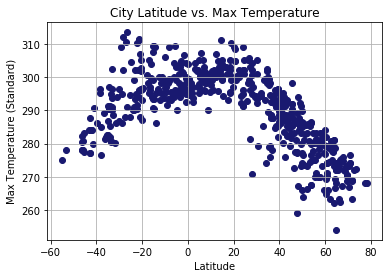

In [24]:
# Setting plot parameters
plt.scatter(weather_DF["Lat"], weather_DF["Max Temp"], c="midnightblue", marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Standard)")
plt.grid()

#### Latitude vs. Humidity Plot

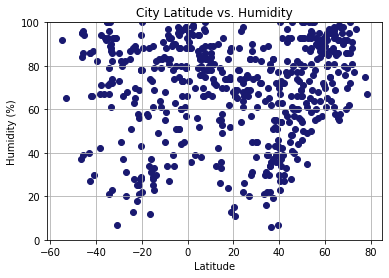

In [26]:
# Setting plot parameters
plt.scatter(weather_DF["Lat"], weather_DF["Humidity"], c="midnightblue", marker="o")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.grid()

#### Latitude vs. Cloudiness Plot

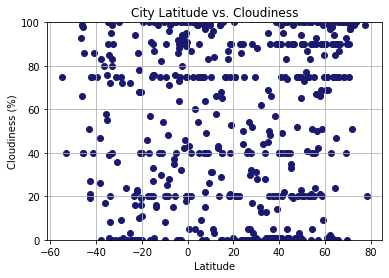

In [27]:
# Setting plot parameters
plt.scatter(weather_DF["Lat"], weather_DF["Cloudiness"], c="midnightblue", marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.grid()

#### Latitude vs. Wind Speed Plot

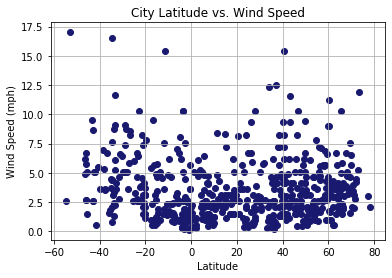

In [28]:
# Setting plot parameters
plt.scatter(weather_DF["Lat"], weather_DF["Wind Speed"], c="midnightblue", marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()